In [383]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [384]:
fashion_mnist = tf.keras.datasets.fashion_mnist

digits_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [385]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


"""class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']"""

"class_names = ['0', '1', '2', '3', '4',\n               '5', '6', '7', '8', '9']"

In [386]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)


10000

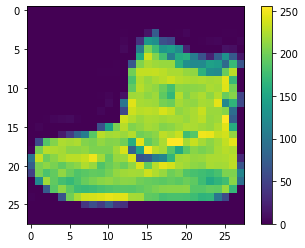

In [387]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [388]:
train_images = train_images / 255.0

test_images = test_images / 255.0

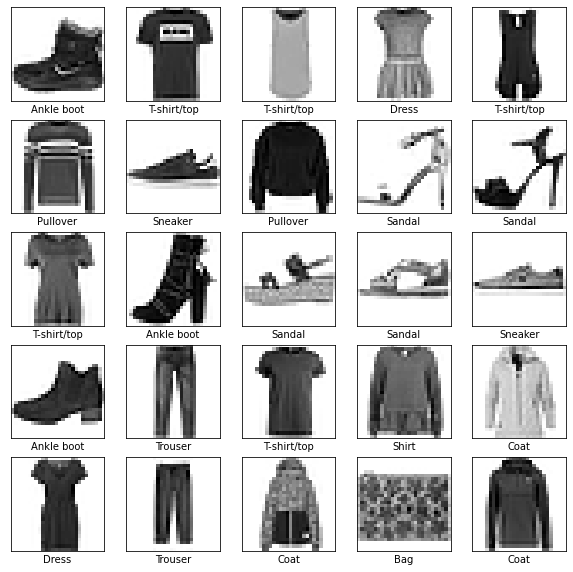

In [389]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [390]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10)
])

In [391]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [392]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4993 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3756 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3369 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2795 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2694 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2478 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.238

In [393]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3410 - accuracy: 0.8796 - 522ms/epoch - 2ms/step

Test accuracy: 0.8795999884605408


In [394]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [395]:
predictions = probability_model.predict(test_images)


In [396]:
predictions[0]


array([2.8683897e-07, 9.0555716e-11, 1.4826492e-08, 1.5034418e-10,
       3.9275974e-08, 9.4174250e-04, 6.9400208e-08, 8.2755787e-03,
       2.9442126e-07, 9.9078208e-01], dtype=float32)

In [397]:
np.argmax(predictions[0])


9

In [398]:
test_labels[0]


9

In [399]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

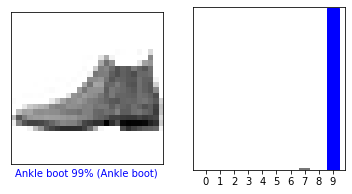

In [400]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

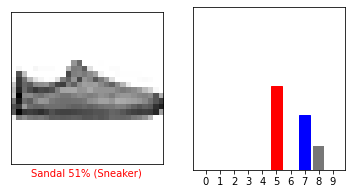

In [401]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

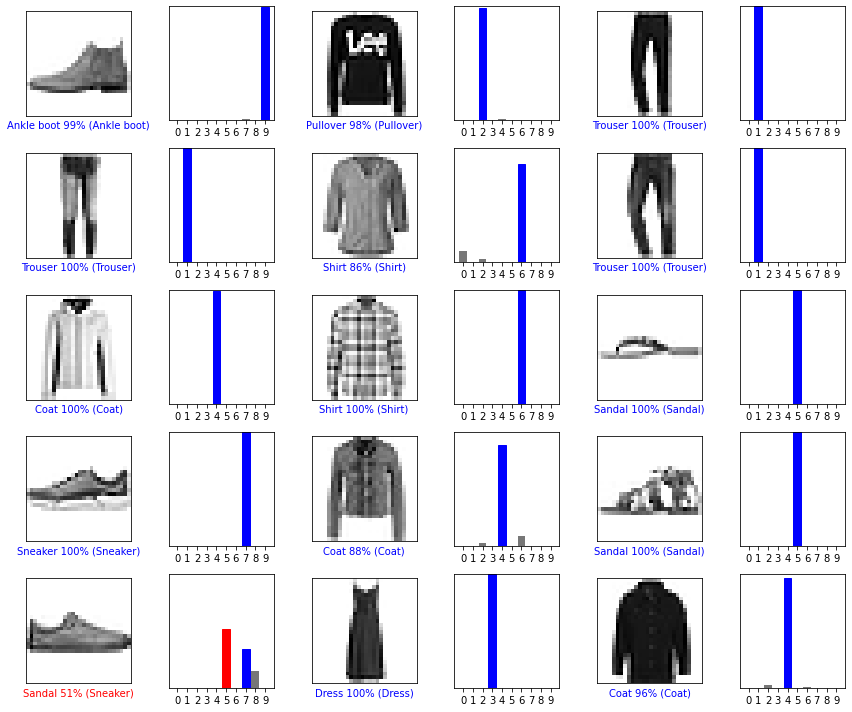

In [402]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [403]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [404]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [405]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.5427895e-04 4.6486551e-13 9.8373401e-01 2.3547663e-07 1.0791260e-02
  3.0356587e-13 5.0202403e-03 2.0930442e-13 1.1395975e-09 1.0052875e-11]]


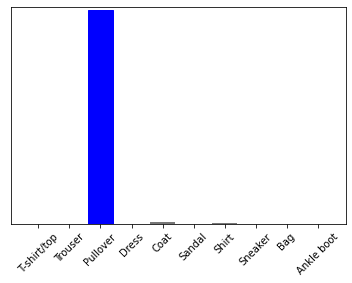

In [406]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [407]:
np.argmax(predictions_single[0])

2

10000
8796
1204
[0.9907821, 0.983734, 0.9999993, 0.9999933, 0.86433226, 0.9999864, 0.9958074, 0.99642855, 0.9999815, 0.99992156, 0.88279706, 0.99991834, 0.99991846, 0.96308917, 0.9998516, 0.987673, 0.99998105, 0.991462, 0.971545, 0.98083097, 0.9999552, 0.9999968, 0.92341423, 0.9480397, 0.98735356, 1.0, 0.9999918, 0.9976926, 0.97720224, 1.0, 0.9933328, 0.99994695, 0.9999472, 0.9998141, 0.9998524, 0.99999976, 0.9548016, 0.9325837, 0.9117427, 0.43311733, 0.99856406, 0.9438367, 0.9981799, 0.74954826, 0.90996903, 0.9767438, 0.99999976, 0.9999951, 0.9991007, 0.9997428, 0.99819297, 0.9999993, 0.99989986, 0.99999964, 0.99998033, 0.6477916, 1.0, 0.99845195, 0.92834306, 0.77438873, 0.78959274, 0.52719396, 0.9941718, 1.0, 0.96776205, 0.99999905, 0.9781181, 0.9920115, 1.0, 1.0, 0.99995387, 0.9999989, 0.99814737, 0.9975508, 0.9657511, 0.99963, 0.9999927, 0.8658615, 0.9857517, 0.99996495, 0.9999949, 0.9993666, 0.81340736, 0.99990165, 0.7406879, 0.66092944, 0.997514, 0.9886107, 0.9999355, 0.99999213,

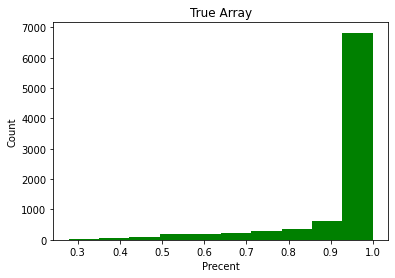

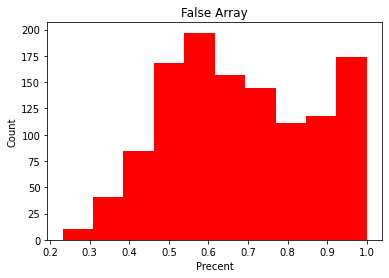

In [408]:
import sklearn
count=0
counterT=0
counterF=0
trueArray=[]
FalseArray=[]
for i in range(0,10000) :
  count=count+1
  predicted_label = np.argmax(predictions[i])
  test_label=(test_labels[i])
  if(predicted_label==test_label):
    trueArray.append(np.max(predictions[i]))
    counterT=counterT+1
  else:
    FalseArray.append(np.max(predictions[i]))
    counterF=counterF+1

print(count)
print(counterT)
print(counterF)
print(trueArray)
plt.hist(trueArray , color ="green")
plt.xlabel('Precent')
plt.ylabel('Count')
# displaying the title
plt.title("True Array")
plt.show()
plt.hist(FalseArray , color ="red")
plt.xlabel('Precent')
plt.ylabel('Count')
# displaying the title
plt.title("False Array")
plt.show()